# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# imports 
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np
#get citipy
from citipy import citipy
from api_keys import weather_key
from datetime import datetime
from scipy.stats import linregress

## Generate Cities List

In [2]:
#set data frame with 550 random long and Lat
city_df = pd.DataFrame({
    "Longitude":(np.random.uniform(-1.8,1.8,550)*100), 
    "Latitude":(np.random.uniform(-0.9,0.9,550)*100)
})
city_df
citycount = len(city_df)
citycount

550

In [3]:
city_name = []
country = []
#extract the cities base on Long and Lat
for count in range(citycount):
    long = city_df.iloc[count]["Longitude"]
    lati = city_df.iloc[count]["Latitude"]
    city=citipy.nearest_city(lati,long)
    get_cityname = city.city_name
    get_county = city.country_code
    
    city_name.append(get_cityname)
    country.append(get_county)
city_df['City']=city_name
city_df['Country']=country

city_df

,Longitude,Latitude,City,Country
0,-143.055649,-85.251585,mataura,pf
1,120.751855,-21.630768,port hedland,au
2,-128.853680,56.993924,terrace,ca
3,-72.059712,43.527686,new london,us
4,64.597603,12.265358,kavaratti,in
...,...,...,...,...
545,-144.681435,38.083847,fortuna,us
546,92.443675,64.338618,teya,ru
547,-161.648569,-34.759470,avarua,ck
548,-148.804494,51.957924,kodiak,us


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Test Connection
city = "longyearbyen"
weather_api = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_key}&units=imperial"
response = requests.get(weather_api).json()
response

{'coord': {'lon': 15.64, 'lat': 78.22},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 35.6,
  'feels_like': 25.95,
  'temp_min': 35.6,
  'temp_max': 35.6,
  'pressure': 1031,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 210},
 'clouds': {'all': 75},
 'dt': 1601654487,
 'sys': {'type': 1,
  'id': 1663,
  'country': 'SJ',
  'sunrise': 1601617353,
  'sunset': 1601653838},
 'timezone': 7200,
 'id': 2729907,
 'name': 'Longyearbyen',
 'cod': 200}

In [4]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []
date_list = []
for city in city_name:
    try:
        weather_api = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_key}&units=imperial"
        w_data = requests.get(weather_api).json()
        temp = w_data["main"]["temp"]
        humid = w_data["main"]["humidity"]
        cloud = w_data["clouds"]["all"]
        wind = w_data["wind"]["speed"]
        date = w_data["dt"]
        #add to list
        temp_list.append(temp)
        humid_list.append(humid)
        cloud_list.append(cloud)
        wind_list.append(wind)
        date_list.append(date)
        print (f"Sucess! The city {city} found!")
    except:
        print (f"Failed! The city {city} NOT found!")
        temp_list.append(np.nan)
        humid_list.append(np.nan)
        cloud_list.append(np.nan)
        wind_list.append(np.nan)
        date_list.append(np.nan)
        
city_df["Temperature"] = temp_list
city_df["Humidity"] = humid_list
city_df["Cloud"] = cloud_list
city_df["Wind Speed"] = wind_list
city_df["Date"] = date_list

Sucess! The city mataura found!
Sucess! The city port hedland found!
Sucess! The city terrace found!
Sucess! The city new london found!
Sucess! The city kavaratti found!
Sucess! The city barrow found!
Sucess! The city longyearbyen found!
Sucess! The city juneau found!
Failed! The city falealupo NOT found!
Sucess! The city salinopolis found!
Sucess! The city beira found!
Sucess! The city kurilsk found!
Sucess! The city provideniya found!
Sucess! The city nikolskoye found!
Sucess! The city elmina found!
Sucess! The city dandong found!
Sucess! The city cabo san lucas found!
Sucess! The city ribeira grande found!
Sucess! The city hobart found!
Sucess! The city bintulu found!
Sucess! The city new norfolk found!
Sucess! The city huilong found!
Sucess! The city saint george found!
Sucess! The city port alfred found!
Sucess! The city cherskiy found!
Sucess! The city phulji found!
Sucess! The city tsaratanana found!
Sucess! The city boyuibe found!
Sucess! The city ushuaia found!
Sucess! The cit

Sucess! The city laguna found!
Failed! The city taolanaro NOT found!
Sucess! The city vaini found!
Sucess! The city ushuaia found!
Sucess! The city manokwari found!
Sucess! The city khatanga found!
Sucess! The city byron bay found!
Sucess! The city bredasdorp found!
Sucess! The city mar del plata found!
Sucess! The city chokurdakh found!
Sucess! The city rikitea found!
Sucess! The city hilo found!
Sucess! The city atuona found!
Sucess! The city berlevag found!
Sucess! The city ushuaia found!
Sucess! The city hisor found!
Failed! The city sentyabrskiy NOT found!
Sucess! The city codrington found!
Sucess! The city ushuaia found!
Sucess! The city basco found!
Sucess! The city richards bay found!
Sucess! The city bluff found!
Sucess! The city lysyye gory found!
Sucess! The city ostrovnoy found!
Sucess! The city avarua found!
Failed! The city sinkat NOT found!
Sucess! The city alta floresta found!
Sucess! The city mataura found!
Failed! The city phrai bung NOT found!
Sucess! The city herman

Sucess! The city ushuaia found!
Sucess! The city busselton found!
Sucess! The city faanui found!
Sucess! The city esperance found!
Sucess! The city bilibino found!
Sucess! The city rincon found!
Sucess! The city zatyshshya found!
Sucess! The city new norfolk found!
Sucess! The city altamira found!
Sucess! The city butaritari found!
Sucess! The city lompoc found!
Failed! The city longlac NOT found!
Failed! The city taolanaro NOT found!
Sucess! The city marawi found!
Sucess! The city saint-philippe found!
Sucess! The city nizhniy tsasuchey found!
Sucess! The city dong hoi found!
Sucess! The city lavrentiya found!
Sucess! The city padang found!
Sucess! The city cape town found!
Sucess! The city old saybrook found!
Sucess! The city bac lieu found!
Sucess! The city black river found!
Sucess! The city port alfred found!
Sucess! The city dikson found!
Sucess! The city busselton found!
Sucess! The city shenjiamen found!
Sucess! The city khuzdar found!
Sucess! The city banda aceh found!
Sucess!

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Save data as csv
city_df = city_df.dropna()
city_df.to_csv("weather_data.csv", encoding="utf-8", index=False)
city_df


,Longitude,Latitude,City,Country,Temperature,Humidity,Cloud,Wind Speed,Date
0,-143.055649,-85.251585,mataura,pf,47.62,70.0,42.0,7.56,1.601656e+09
1,120.751855,-21.630768,port hedland,au,77.00,69.0,53.0,14.99,1.601656e+09
2,-128.853680,56.993924,terrace,ca,57.20,93.0,75.0,2.24,1.601656e+09
3,-72.059712,43.527686,new london,us,60.06,59.0,90.0,9.17,1.601656e+09
4,64.597603,12.265358,kavaratti,in,81.32,79.0,69.0,12.62,1.601656e+09
...,...,...,...,...,...,...,...,...,...
545,-144.681435,38.083847,fortuna,us,53.60,100.0,1.0,1.70,1.601656e+09
546,92.443675,64.338618,teya,ru,33.87,91.0,94.0,6.89,1.601656e+09
547,-161.648569,-34.759470,avarua,ck,73.40,88.0,85.0,5.82,1.601656e+09
548,-148.804494,51.957924,kodiak,us,51.80,87.0,90.0,26.40,1.601656e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_df.describe()

,Longitude,Latitude,Temperature,Humidity,Cloud,Wind Speed,Date
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02
mean,-5.454377,-1.898920,60.012495,72.158954,52.762575,10.998330,1.601656e+09
std,106.500439,50.160401,18.298031,19.859610,36.964019,7.495265,2.827075e+02
min,-178.355857,-88.875528,20.860000,8.000000,0.000000,0.430000,1.601655e+09
25%,-99.719049,-46.433821,46.670000,64.000000,20.000000,5.550000,1.601656e+09
50%,-13.489654,-1.459502,59.000000,78.000000,62.000000,8.930000,1.601656e+09
75%,91.604678,39.137053,73.400000,87.000000,90.000000,14.990000,1.601656e+09
max,179.919690,89.916733,102.830000,100.000000,100.000000,29.970000,1.601656e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
maxhumid = city_df.index[city_df["Humidity"]>100].tolist()
maxhumid

[]

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#no Humid > 100 apparently so I'll keep using the current data
city_df.head()

,Longitude,Latitude,City,Country,Temperature,Humidity,Cloud,Wind Speed,Date
0,-143.055649,-85.251585,mataura,pf,47.62,70.0,42.0,7.56,1.601656e+09
1,120.751855,-21.630768,port hedland,au,77.00,69.0,53.0,14.99,1.601656e+09
2,-128.853680,56.993924,terrace,ca,57.20,93.0,75.0,2.24,1.601656e+09
3,-72.059712,43.527686,new london,us,60.06,59.0,90.0,9.17,1.601656e+09
4,64.597603,12.265358,kavaratti,in,81.32,79.0,69.0,12.62,1.601656e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot shows the Temperature change base on the Latitude


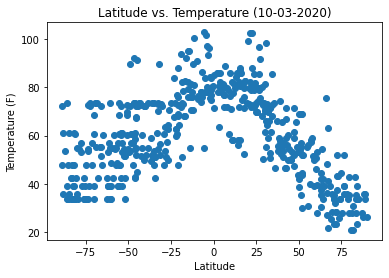

In [121]:
#get current date set to mmddyyy
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.scatter(city_df["Latitude"],city_df["Temperature"])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"Latitude vs. Temperature ({date})")
plt.savefig("Images/latitueVStemp.png")
print("This plot shows the Temperature change base on the Latitude")

## Latitude vs. Humidity Plot

This plot shows the Humidity change base on the Latitude


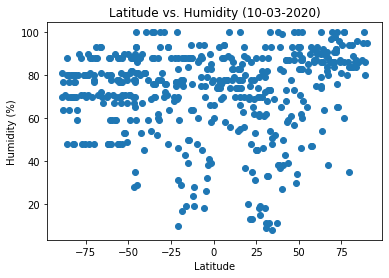

In [122]:
plt.scatter(city_df["Latitude"],city_df["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"Latitude vs. Humidity ({date})")
plt.savefig("Images/latitueVShumid.png")
print("This plot shows the Humidity change base on the Latitude")

## Latitude vs. Cloudiness Plot

This plot shows the Cloudiness change base on the Latitude


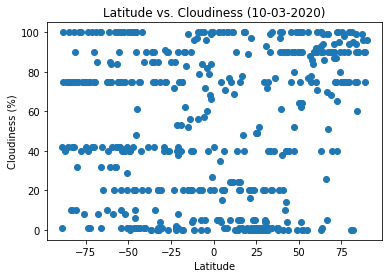

In [123]:
plt.scatter(city_df["Latitude"],city_df["Cloud"])
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"Latitude vs. Cloudiness ({date})")
plt.savefig("Images/latitueVScloud.png")
print("This plot shows the Cloudiness change base on the Latitude")

## Latitude vs. Wind Speed Plot

This plot shows the Wind Speed change base on the Latitude


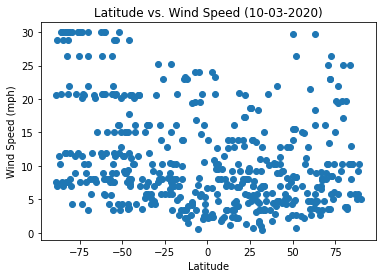

In [124]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"Latitude vs. Wind Speed ({date})")
plt.savefig("Images/latitueVSwind.png")
print("This plot shows the Wind Speed change base on the Latitude")

## Linear Regression

In [134]:
northhem = city_df.loc[city_df["Latitude"] > 0]
southhem = city_df.loc[city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7362131659839138


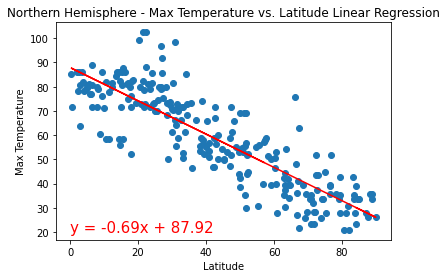

In [135]:
#get Northern Hemisphere
ynorth = northhem["Temperature"]
northlat = northhem["Latitude"]

#regress
(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(northlat,ynorth)
regress_values = northlat * north_slope + north_intercept
line_eq = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

print(f"The r-squared is: {north_rvalue**2}")
#plot
plt.scatter(northlat,ynorth)
plt.plot(northlat,regress_values,"r-")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")


plt.savefig("Images/NorthlatitueVStemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47352608027195325


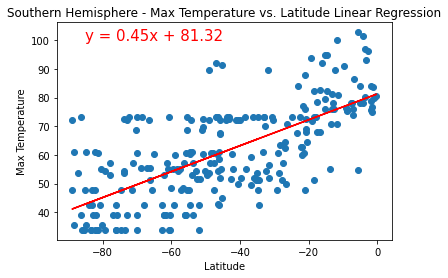

In [136]:
#get Southern Hemisphere
ysouth = southhem["Temperature"]
southlat = southhem["Latitude"]

#regress
(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(southlat,ysouth)
regress_values = southlat * south_slope + south_intercept
line_eq = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

print(f"The r-squared is: {south_rvalue**2}")
#plot
plt.scatter(southlat,ysouth)
plt.plot(southlat,regress_values,"r-")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.annotate(line_eq,(-85,100),fontsize=15,color="red")
plt.savefig("Images/SouthlatitueVStemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08432088016275549


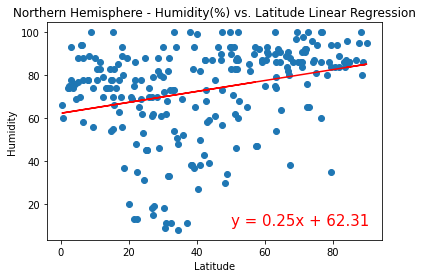

In [137]:
#get Northern Hemisphere
ynorth = northhem["Humidity"]
northlat = northhem["Latitude"]

#regress
(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(northlat,ynorth)
regress_values = northlat * north_slope + north_intercept
line_eq = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

print(f"The r-squared is: {north_rvalue**2}")
#plot
plt.scatter(northlat,ynorth)
plt.plot(northlat,regress_values,"r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.savefig("Images/NorthlatitueVShumid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015914065905458186


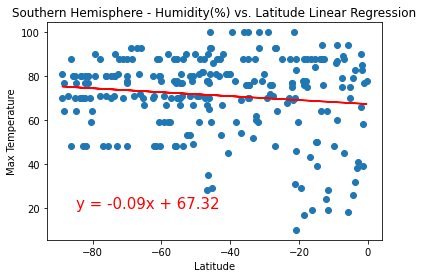

In [138]:
#get Southern Hemisphere
ysouth = southhem["Humidity"]
southlat = southhem["Latitude"]

#regress
(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(southlat,ysouth)
regress_values = southlat * south_slope + south_intercept
line_eq = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

print(f"The r-squared is: {south_rvalue**2}")
#plot
plt.scatter(southlat,ysouth)
plt.plot(southlat,regress_values,"r-")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(-85,20),fontsize=15,color="red")
plt.savefig("Images/SouthlatitueVShumid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2381353202055334


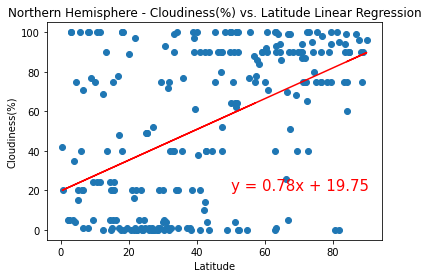

In [139]:
#get Northern Hemisphere
ynorth = northhem["Cloud"]
northlat = northhem["Latitude"]

#regress
(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(northlat,ynorth)
regress_values = northlat * north_slope + north_intercept
line_eq = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

print(f"The r-squared is: {north_rvalue**2}")
#plot
plt.scatter(northlat,ynorth)
plt.plot(northlat,regress_values,"r-")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.savefig("Images/NorthlatitueVScloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01417728840887521


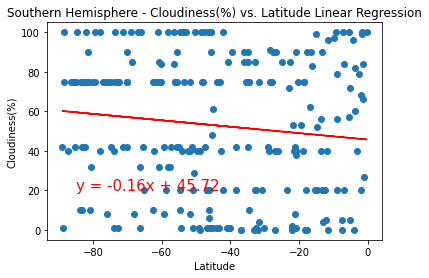

In [140]:
#get Southern Hemisphere
ysouth = southhem["Cloud"]
southlat = southhem["Latitude"]

#regress
(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(southlat,ysouth)
regress_values = southlat * south_slope + south_intercept
line_eq = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

print(f"The r-squared is: {south_rvalue**2}")
#plot
plt.scatter(southlat,ysouth)
plt.plot(southlat,regress_values,"r-")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.annotate(line_eq,(-85,20),fontsize=15,color="red")
plt.savefig("Images/SouthlatitueVScloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02262035551922787


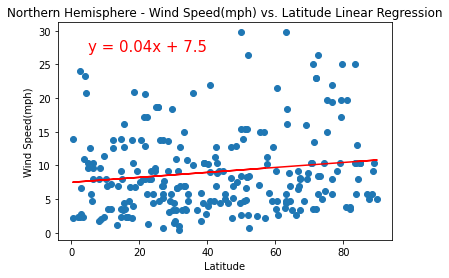

In [141]:
#get Northern Hemisphere
ynorth = northhem["Wind Speed"]
northlat = northhem["Latitude"]
#regress
(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(northlat,ynorth)
regress_values = northlat * north_slope + north_intercept
line_eq = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

print(f"The r-squared is: {north_rvalue**2}")
#plot
plt.scatter(northlat,ynorth)
plt.plot(northlat,regress_values,"r-")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.annotate(line_eq,(5,27),fontsize=15,color="red")
plt.savefig("Images/NorthlatitueVSwind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15162055953350698


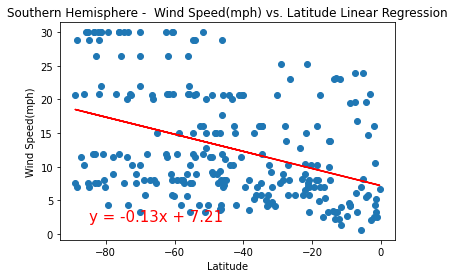

In [142]:
#get Southern Hemisphere
ysouth = southhem["Wind Speed"]
southlat = southhem["Latitude"]

#regress
(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(southlat,ysouth)
regress_values = southlat * south_slope + south_intercept
line_eq = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

print(f"The r-squared is: {south_rvalue**2}")
#plot
plt.scatter(southlat,ysouth)
plt.plot(southlat,regress_values,"r-")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere -  Wind Speed(mph) vs. Latitude Linear Regression")
plt.annotate(line_eq,(-85,2),fontsize=15,color="red")
plt.savefig("Images/SouthlatitueVSwind.png")